In [1]:
%pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached pillow-11.1.0-cp39-cp39-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.6 MB/s eta 0:00:00
Using cached importlib_resources-6.5

In [4]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow

In [2]:
import os
# Define the base path correctly
base_path = r"D:\project_folder\data\images"

# Update paths for train, validation, and test sets
train_path = os.path.join(base_path, "TRAIN")
valid_path = os.path.join(base_path, "TEST_SIMPLE")
test_path = os.path.join(base_path, "TEST")

# Print paths to verify
print("Train Path:", train_path)
print("Validation Path:", valid_path)
print("Test Path:", test_path)

Train Path: D:\project_folder\data\images\TRAIN
Validation Path: D:\project_folder\data\images\TEST_SIMPLE
Test Path: D:\project_folder\data\images\TEST


In [3]:
# function is used to create an image dataset from a directory structure where images are organized into subdirectories representing class labels
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,=
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 9957 files belonging to 4 classes.


In [4]:
# Get the class labels
labels = training_set.class_names
print(labels)


['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 71 files belonging to 4 classes.


In [6]:
import tensorflow as tf

cnn = tf.keras.models.Sequential()

# Block 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 2
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 3 (Removed Redundant Input Shape)
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 5
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Dropout for Regularization
cnn.add(tf.keras.layers.Dropout(0.4))

# Flattening & Fully Connected Layers
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1024, activation='relu'))  # Reduced from 1500
cnn.add(tf.keras.layers.Dropout(0.5))

# Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))  # Ensure categorical_crossentropy loss



c:\Users\NIKHIL CHOUGULE\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])



In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,818,468 (26.01 MB)

 Trainable params: 6,816,484 (26.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [9]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 183s 575ms/step - accuracy: 0.3230 - loss: 2.4163 - val_accuracy: 0.6761 - val_loss: 1.1345
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 189s 605ms/step - accuracy: 0.6492 - loss: 0.8055 - val_accuracy: 0.5211 - val_loss: 1.2175
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 209s 671ms/step - accuracy: 0.8443 - loss: 0.3812 - val_accuracy: 0.8310 - val_loss: 0.4572
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 191s 612ms/step - accuracy: 0.8884 - loss: 0.2873 - val_accuracy: 0.6338 - val_loss: 1.2126
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 187s 600ms/step - accuracy: 0.9439 - loss: 0.1452 - val_accuracy: 0.6761 - val_loss: 1.3118
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 187s 598ms/step - accuracy: 0.9349 - loss: 0.1760 - val_accuracy: 0.8028 - val_loss: 0.8695
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 185s 592ms/step - accuracy: 0.9752 - loss: 0.0643 - val_accuracy: 0.2394 - val_loss: 5.5025
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 184s 591ms/step - accuracy: 0.9579 -

In [10]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

312/312 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.7380 - loss: 1.1159
Training accuracy: 0.7360650897026062


In [11]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8483 - loss: 0.6619 
Validation accuracy: 0.8450704216957092


In [13]:
cnn.save(r"D:\project_folder\data\images\trained_cancer_model.h5")

In [14]:
training_history.history

{'accuracy': [0.41970473527908325,
  0.7125640511512756,
  0.8697398900985718,
  0.9129256010055542,
  0.9529978632926941,
  0.9549061059951782,
  0.9751933217048645,
  0.9687656760215759,
  0.9848347902297974,
  0.9802149534225464],
 'loss': [1.7658586502075195,
  0.6618441939353943,
  0.3229299783706665,
  0.22155924141407013,
  0.12534646689891815,
  0.11994454264640808,
  0.06607359647750854,
  0.09128586202859879,
  0.04505916312336922,
  0.05749405547976494],
 'val_accuracy': [0.6760563254356384,
  0.5211267471313477,
  0.8309859037399292,
  0.6338028311729431,
  0.6760563254356384,
  0.8028169274330139,
  0.23943662643432617,
  0.7746478915214539,
  0.9154929518699646,
  0.8450704216957092],
 'val_loss': [1.1344777345657349,
  1.2175222635269165,
  0.45715293288230896,
  1.2125916481018066,
  1.3117820024490356,
  0.8695148825645447,
  5.502493381500244,
  1.108751654624939,
  0.6748229265213013,
  0.7274527549743652]}

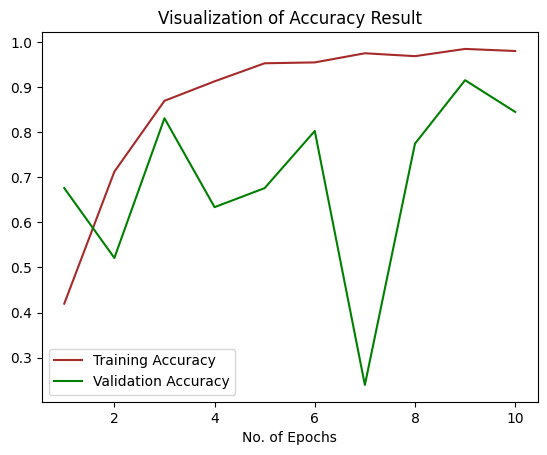

In [15]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()